# Forward Neural Network Training

In [131]:
%matplotlib inline
TRAIN_DIR = './data/sin_train_samples.csv'
TEST_DIR = './data/sin_test_samples.csv'  # these samples are retained for model evaluation.


lr = 1e-2  # learning rate
n_epochs = 5000  # number of epochs

INPUT_DIM = 1  # dimension of feature
OUTPUT_DIM = 1  # dimension of target
HIDDEN_NUM = 3  # size of hidden layer

## 1. Model Initialization

In [132]:
from model import multiple_layer_perceptron as mlp
import numpy as np

net = mlp.get_model(INPUT_DIM, OUTPUT_DIM, HIDDEN_NUM)  # 3-layer forward neural network

def squared_loss(y_hat, y):
    """ MSE """
    return (y.reshape(y_hat.shape) - y_hat) ** 2 / 2, y.reshape(y_hat.shape) - y_hat

## 2. Model Training

start loading validating data ...
The number of validating data is: 50.


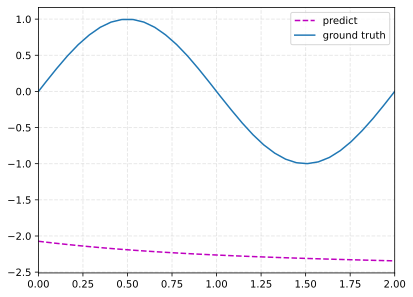

In [133]:
from data_util.DataLoader import DataSet, DataLoader
from data_util.Animator import MyAnimator
from train import train_per_epoch, eval_per_epoch
import matplotlib.pyplot as plt

print("start loading validating data ...")
test_dataset = DataSet(TEST_DIR, split='test')
test_dataloader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)
print("The number of validating data is: %d." % len(test_dataset))

for i, (features, target) in enumerate(test_dataloader):
    pred_target = net(features)
fig = plt.figure()
ax_1 = fig.add_subplot(111)
ax_1.set(xlim=[0, 2])
plt.grid(linestyle='--', linewidth=1, alpha=0.3)
plt.plot(features, pred_target, 'm--', label='predict')
plt.plot(features, target, '-', label='ground truth')
plt.legend()
# plt.savefig('../fig/NN/untrained_h=3.pdf', bbox_inches='tight', pad_inches=0.0)

plt.show()

### (1) Mini-Batch Backpropagation

Training mean loss: 0.000015
Evaluating mean loss: 0.162644


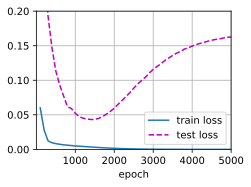

In [134]:
print("start loading training data ...")
train_dataset = DataSet(TRAIN_DIR, split='train')
train_dataloader = DataLoader(train_dataset, 5, shuffle=True)  # batch_size is set to 5
print("The number of training data is: %d." % len(train_dataset))

animator = MyAnimator(xlabel='epoch', xlim=[1, n_epochs], ylim=[0.0, 2e-1],
                        legend=['train loss', 'test loss'])

for epoch in range(n_epochs):

    train_metrics = train_per_epoch(net, train_dataloader, squared_loss, lr)
    eval_metrics = eval_per_epoch(net, test_dataloader, squared_loss)
    if epoch % 100 == 99:
        animator.add(epoch + 1, (train_metrics, eval_metrics))
        
print('Training mean loss: %f' % train_metrics)
print('Evaluating mean loss: %f' % eval_metrics)
animator.savefig('../fig/NN/training_loss_h=3_epoch=5000.pdf')

### (2) Results

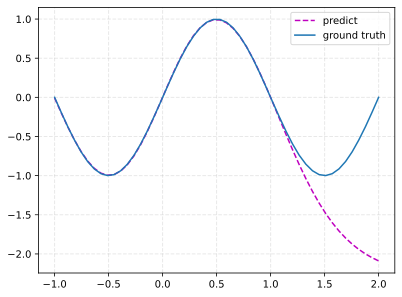

In [135]:
for i, (features, target) in enumerate(test_dataloader):
    pred_target = net(features)
fig = plt.figure()
plt.grid(linestyle='--', linewidth=1, alpha=0.3)
plt.plot(features, pred_target, 'm--', label='predict')
plt.plot(features, target, '-', label='ground truth')
plt.legend()
# plt.savefig('../fig/NN/predict.pdf', bbox_inches='tight', pad_inches=0.0)

plt.show()